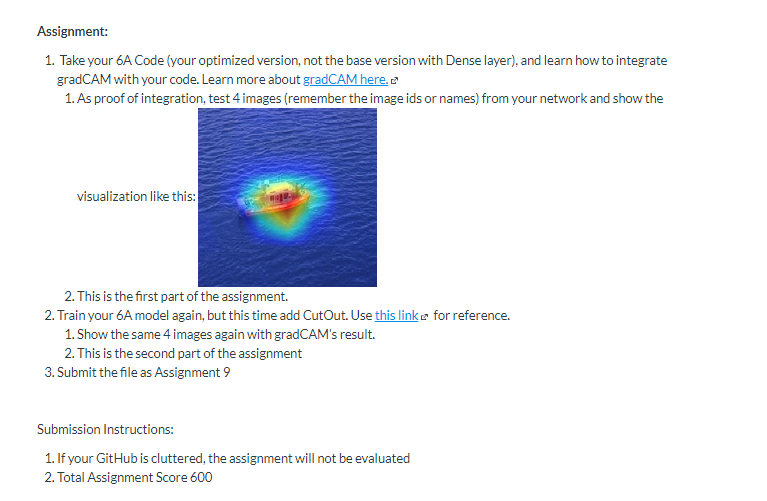

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment9')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Training the code for 100 epochs and then save the model.
## Use the model to display the grad cam result

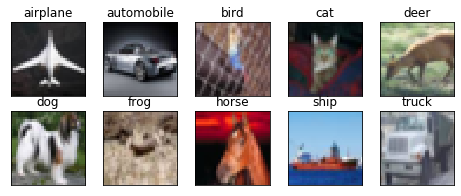

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:92: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 96)       

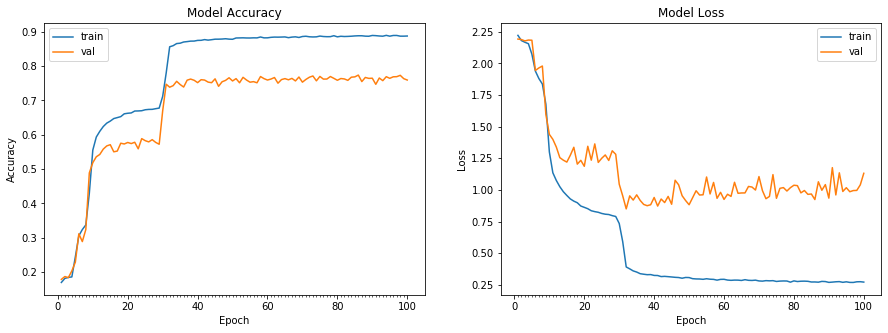

Accuracy on test data is: 75.94


In [6]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(10, 2, 2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))
# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model.save_weights('Assignment_9_grad_cam.h5')

# Grad Cam

In [0]:
# (train_features, train_labels), (test_features, test_labels)

x_test = test_features
def preprocess_input(x, **kwargs):
    return x

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
8
Tensor("strided_slice_33:0", shape=(?,), dtype=float32)
(32, 32, 3)


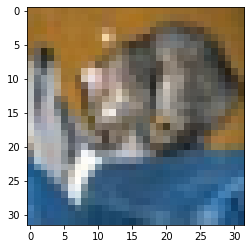

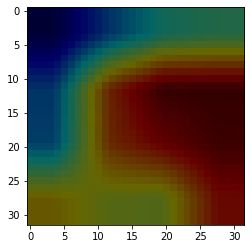

In [18]:
from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', x_test[0].shape)
x_test_preprocess = preprocess(x_test[0])
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_19")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', x_test[0])
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(x_test[0])
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
7
Tensor("strided_slice_59:0", shape=(?,), dtype=float32)
(32, 32, 3)


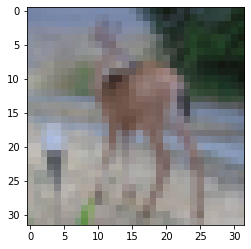

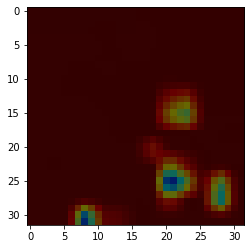

In [31]:
image_file_name = x_test[100]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_65:0", shape=(?,), dtype=float32)
(32, 32, 3)


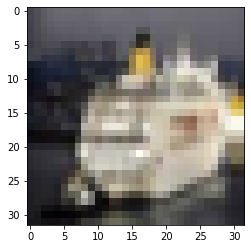

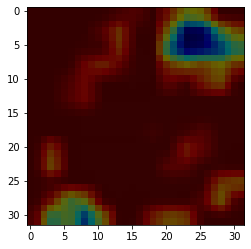

In [34]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_71:0", shape=(?,), dtype=float32)
(32, 32, 3)


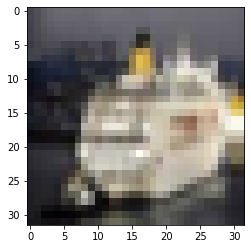

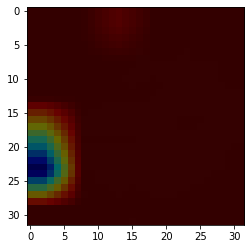

In [37]:
image_file_name = x_test[260]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_18")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()

x_test[0] shape : (32, 32, 3)
x_test_preprocess : (1, 32, 32, 3)
preds.shape : (1, 10)
9
Tensor("strided_slice_85:0", shape=(?,), dtype=float32)
(32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


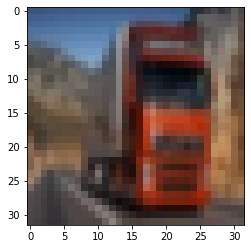

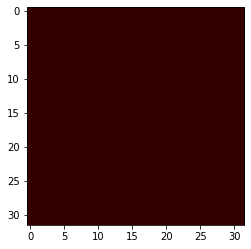

In [44]:
image_file_name = x_test[360]


from skimage.transform import resize
def preprocess(x):
    x = resize(x, (32,32), mode='constant') * 255
    x = preprocess_input(x)
    if x.ndim == 3:
        x = np.expand_dims(x, 0)
    return x
print ('x_test[0] shape :', image_file_name.shape)
x_test_preprocess = preprocess(image_file_name)
print ('x_test_preprocess :', x_test_preprocess.shape)
preds = model.predict(x_test_preprocess)
print ('preds.shape :', preds.shape)


class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
print(class_output)

last_conv_layer = model.get_layer("conv2d_17")
print(last_conv_layer)
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test_preprocess])

for i in range(96):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

import cv2
import matplotlib.pyplot as plt

cv2.imwrite('color_img.jpg', image_file_name)
import os
img_path= os.path.join(os.getcwd(),'color_img.jpg')
img = cv2.imread(img_path)
# print(img)
# plt.imshow(img)
# plt.show()
# img = x_test[0]#cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print(heatmap.shape)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(image_file_name)
plt.show()
plt.imshow( superimposed_img)
plt.show()